### CONTENTS

- Decision Tree
    - id3
        - entropy
        - information gain
        - gain
    - cart

- Linear
    - Logistic Regression
    - SVM
- Non Linear 
    - KNN(lazy algorithm)
    - Decision tree
    - Random Forest
    - Navie Bayes classifier

### Decision Tree using Id3

- entropy ---> uncertainity in data
- information gain ---> diff b/w entropy before and after splliting the data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys

<function Bunch.keys>

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import pandas as pd
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["target"]=iris.target

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris_df["target"].unique()

array([0, 1, 2])

In [7]:
x = iris_df.drop("target",axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = iris_df["target"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=30)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0,
       1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [15]:
confusion_matrix(y_test,y_pred)

array([[34,  0,  0],
       [ 0, 32,  6],
       [ 0,  1, 32]], dtype=int64)

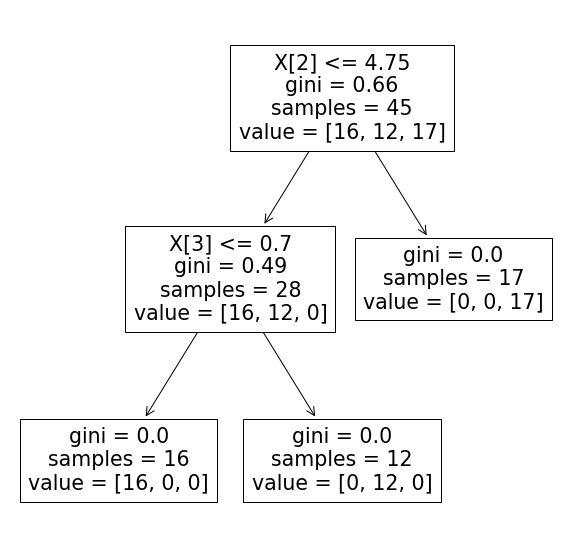

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

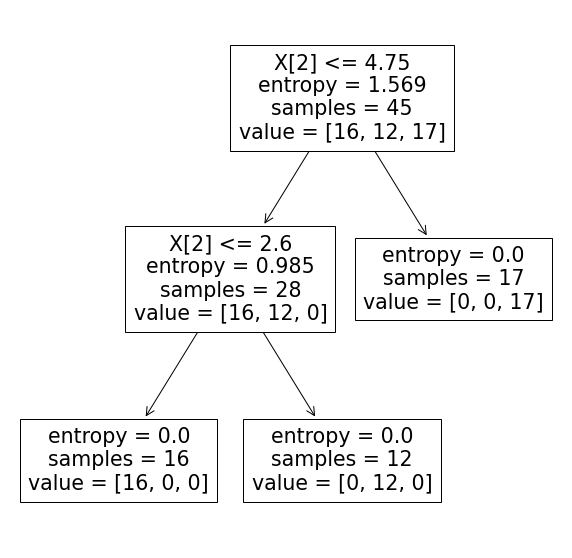

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(model1)
plt.show()

### Heart Disease

In [19]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
x1 = data.drop("target",axis=1)
y1 = data["target"]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.3,random_state=25)

In [23]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()
mod.fit(x_train,y_train)

DecisionTreeClassifier()

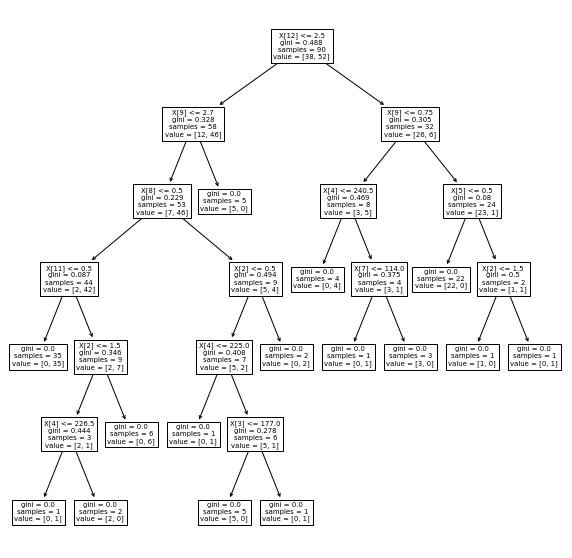

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(mod)
plt.show()

In [25]:
y_pred=mod.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)*100

76.99530516431925

In [27]:
confusion_matrix(y_test,y_pred)

array([[71, 29],
       [20, 93]], dtype=int64)

In [28]:
from sklearn.tree import DecisionTreeClassifier
mod1=DecisionTreeClassifier(criterion='entropy')
mod1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

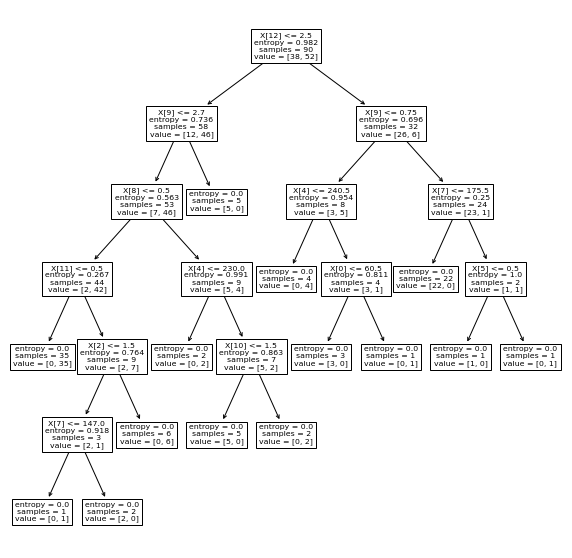

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(mod1)
plt.show()

In [30]:
accuracy_score(y_test,y_pred)

0.7699530516431925

### Decision Tree Regressor

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/age_salary_hours.csv")
df.head()

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Annual Salary  500 non-null    float64
 2   Weekly hours   500 non-null    float64
 3   Education      500 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [58]:
df["Education"].value_counts()

Bachelor's degree or higher    237
High school diploma            107
Attended college, no degree     89
Associate's degree              50
No diploma                      17
Name: Education, dtype: int64

In [59]:
df.isna().sum()

Age              0
Annual Salary    0
Weekly hours     0
Education        0
dtype: int64

In [60]:
x = df.loc[:,["Age","Weekly hours"]]
x

,Age,Weekly hours
0,72,40.0
1,72,50.0
2,31,40.0
3,28,40.0
4,54,40.0
...,...,...
495,27,40.0
496,53,70.0
497,51,20.0
498,32,35.0


In [61]:
y=df["Annual Salary"]
y

0      160000.0
1      100000.0
2      120000.0
3       45000.0
4       85000.0
         ...   
495     47000.0
496    132000.0
497     10100.0
498     57000.0
499     18700.0
Name: Annual Salary, Length: 500, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=25)

In [63]:
from sklearn.tree import DecisionTreeRegressor
m = DecisionTreeRegressor()
m.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
y_pred = m.predict(x_test)
y_pred

array([ 21700.        ,      0.        ,  29500.        , 112000.        ,
            0.        ,  65000.        ,      0.        ,      0.        ,
        38300.        ,  45000.        ,  18000.        ,  15600.        ,
            0.        ,      0.        ,  50666.66666667,  31000.        ,
        43000.        ,      0.        , 110000.        ,  50666.66666667,
        31000.        , 112000.        ,  50666.66666667,      0.        ,
            0.        , 185000.        ,  31000.        ,  30000.        ,
       112000.        ,  21700.        ,  40000.        ,  20800.        ,
       120000.        ,      0.        ,  65000.        ,      0.        ,
        46500.        ,      0.        ,  47500.        ,  53000.        ,
       125500.        ,  46500.        , 180000.        , 162000.        ,
       250000.        , 100000.        , 100933.33333333,  73500.        ,
            0.        , 250000.        ,      0.        ,  53000.        ,
        49500.        ,  

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

7.4949583421900945

In [66]:
mean_squared_error(y_test,y_pred)

9154371838.380953

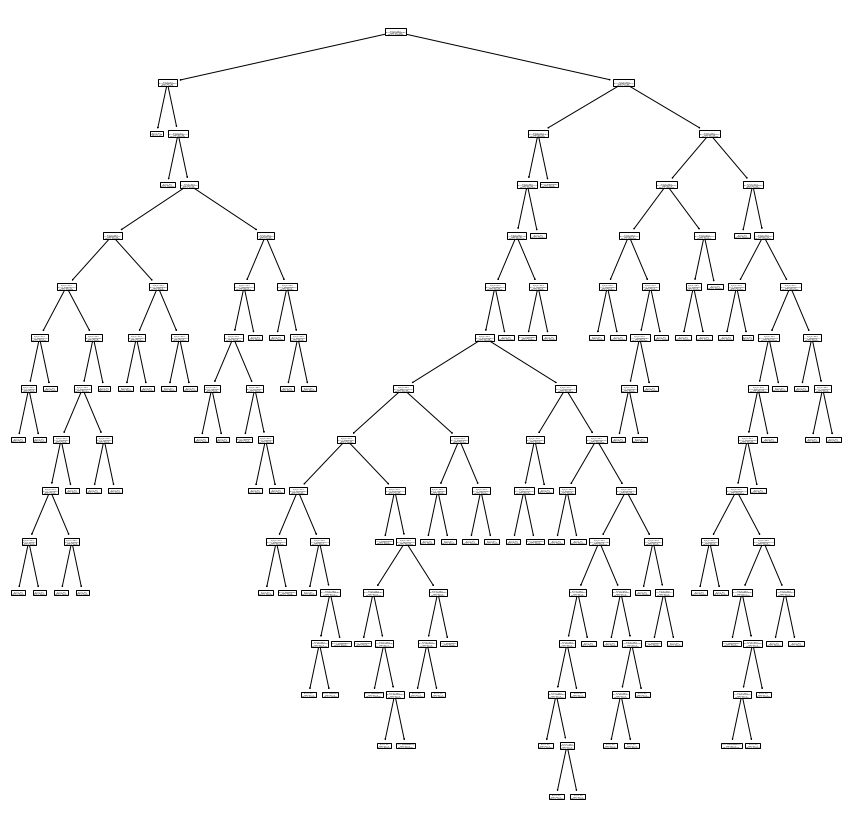

In [67]:
plt.figure(figsize=(15,15))
tree.plot_tree(m)
plt.show()

In [68]:
# decision tree regressor for nsurance data sset

In [69]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['sex'] = label.fit_transform(df["sex"])
df["smoker"]=label.fit_transform(df["smoker"])
df["region"]=label.fit_transform(df["region"])

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [74]:
x = df.iloc[:,:7]
y = df["charges"]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=25)

In [76]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
y_pred = dr.predict(x_test)
y_pred

array([ 8551.347  ,  7151.092  , 10493.9458 , 19798.05455, 21984.47061,
        2200.83085,  8835.26495,  9748.9106 , 11264.541  ,  4500.33925,
        5138.2567 ,  8978.1851 ,  1727.785  , 21348.706  ,  5012.471  ,
       15612.19335, 10107.2206 , 10493.9458 ,  1526.312  , 34806.4677 ,
        8835.26495, 17626.23951,  7650.77375, 11264.541  ,  7325.0482 ,
        8835.26495,  8932.084  , 13143.33665,  2217.6012 ,  9386.1613 ,
        6393.60345, 36021.0112 , 22493.65964,  7265.7025 ,  3378.91   ,
       27000.98473, 11840.77505, 36021.0112 ,  9625.92   , 10493.9458 ,
       27218.43725, 27000.98473,  2221.56445,  6653.7886 , 38245.59327,
        5116.5004 ,  9304.7019 , 29523.1656 , 43896.3763 ,  1137.011  ,
        2198.18985, 11454.0215 , 22493.65964,  9875.6804 ,  7804.1605 ,
        4058.1161 ,  9634.538  , 42760.5022 ,  3537.703  , 14349.8544 ,
       10959.6947 ,  9872.701  ,  9386.1613 , 23244.7902 , 15612.19335,
        4415.1588 , 24059.68019,  7243.8136 ,  1632.03625,  8444

In [78]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

99.61593588165321

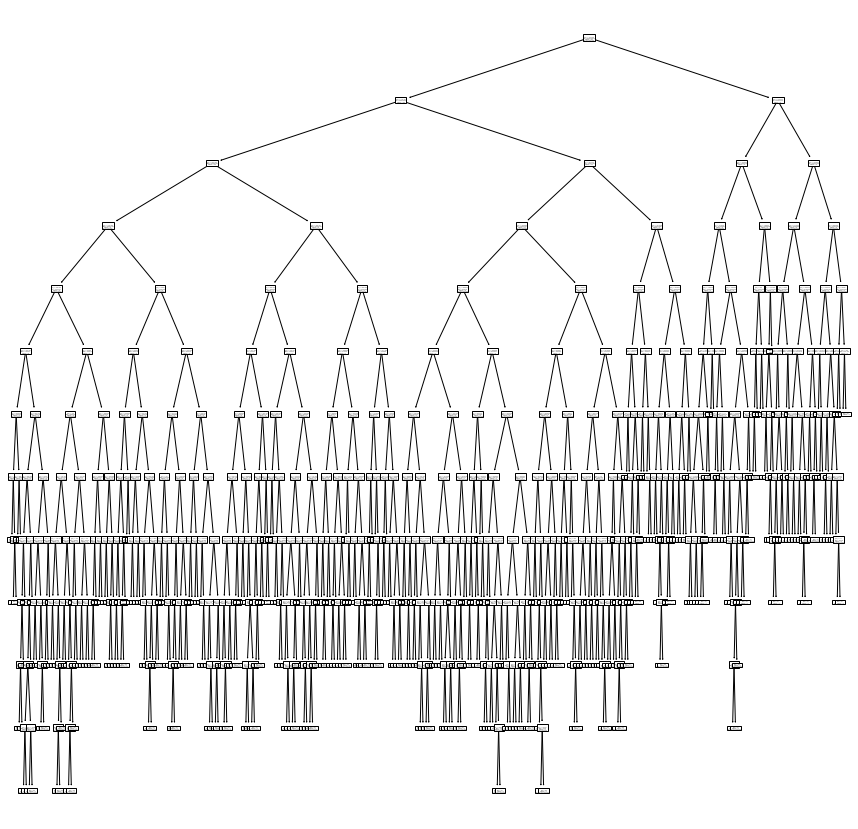

In [79]:
plt.figure(figsize=(15,15))
tree.plot_tree(dr)
plt.show()